#### Import necessary models and dataset

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

cd = pd.read_csv("CreditDataset.csv")

In [166]:
#check the columns and if data is complete
cd.columns

Index(['a_or_b', 'Col_2', 'Col_3', 'p_g_or_gg',
       'ff_d_i_k_j_aa_m_c_w_e_q_r_cc_or_x ', 'ff_dd_j_bb_v_n_o_h_or_z',
       'Col_7', 't_or_f', 'Col_11', 'qt_or_rs', 's_g_or_p', 'Col_12', 'Col_13',
       'Target '],
      dtype='object')

In [252]:
cd.isnull().values.any()

False

In [253]:
#rename the target column to remove whitespace
cd.rename(columns={"Target ":"Target"}, inplace=True)
cd.columns

Index(['a_or_b', 'Col_2', 'Col_3', 'p_g_or_gg',
       'ff_d_i_k_j_aa_m_c_w_e_q_r_cc_or_x ', 'ff_dd_j_bb_v_n_o_h_or_z',
       'Col_7', 't_or_f', 'Col_11', 'qt_or_rs', 's_g_or_p', 'Col_12', 'Col_13',
       'Target'],
      dtype='object')

#### Split the dependant variable dataframe from the independant variablesand create a traning & test data split

In [254]:
#create the dependant variable and independant variable sets 
x = cd.drop('Target', axis=1)
y = cd['Target']

#create the traning and test data split with equal numbers
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=1)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(345, 13) (345, 13) (345,) (345,)


## Use Linear regression model to predict target data

In [255]:
#create our linear regression
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

In [256]:
lin_reg.coef_

array([-5.33072818e-03,  1.50450162e-04, -2.38816377e-03,  5.32866012e-02,
        1.49409757e-02,  1.27126201e-03,  1.09817643e-02,  5.98643184e-01,
        1.04192556e-02, -2.72267537e-03,  3.06438355e-02, -2.89637926e-04,
        8.63968947e-06])

In [257]:
y_pred_lin = lin_reg.predict(x_test)

Text(0, 0.5, 'Predicted data')

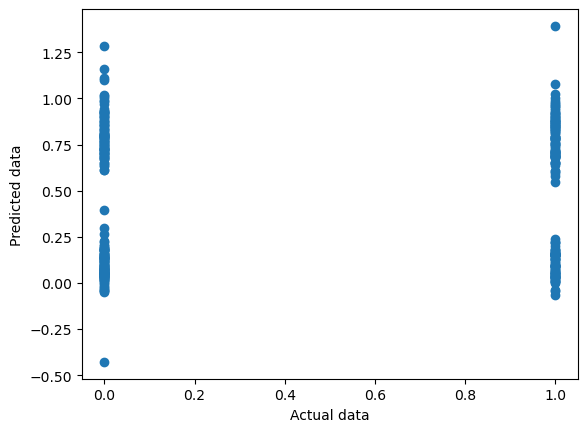

In [258]:
plt.scatter(y_train,y_pred_lin)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")

# Using Logarithmic regression

In [259]:
#create a logarithmic regression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [260]:
log_reg.coef_

array([[-6.22704710e-02,  4.07752015e-03, -1.10442607e-02,
         3.07719045e-01,  1.40811567e-01,  1.41865045e-02,
         1.23007725e-01,  2.62856912e+00,  1.90815281e-01,
        -4.59844117e-02,  4.47370693e-02, -2.59251552e-03,
         3.67291320e-04]])

In [261]:
y_pred_log = log_reg.predict(x_test)

## Compare the logarithmic vs linear models using mean squared error value

In [262]:
from sklearn.metrics import mean_squared_error
mse_log = mean_squared_error(y_test, y_pred_log)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print ("linear regression MSE: ", mse_lin, "\nlogistic regression MSE: ",mse_log)
print("Linear regression performed better by: ", round(mse_log-mse_lin,3))

linear regression MSE:  0.09835278317617939 
logistic regression MSE:  0.11884057971014493
Linear regression performed better by:  0.02


The linear regression model perfoms slightly better than the logistic regression model for the given data set but overall they both have a low mean squared error value to our target value 1 which shows that our prediction models are very effective